## Classifies Myers-Briggs Personality Type (MBTI) based on posts data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#text visualisation
from wordcloud import WordCloud

import string
import nltk
import spacy

In [ ]:
train = pd.read_csv('TRAIN.csv', dtype='string')
train

,idx,type,posts,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258,Unnamed: 259
0,0,ENFP,'I like that you are kind,as INFJ I find that I love you all easily,Its so natural to fit next to you and relax,enjoy time and not feel like i have to do thi...,and other social...|||I found that when this ...,and he is laying out hints and you just are g...,me and a enfj i know are in the same place,though I still love him,and he appears to have feelings for me,I wonder if the possibility is there...|||I f...,depending on my moods. I am genreally a 50/50...,we are fairly resilient. I mean honestly we t...,if I love them I always keep trying even thou...,I have deve3loped said wall already,and it ruined the best love i ever had becaus...,I always feel like your hididng something.|||...,most of it genrally stays internalized. But O...,do I actully go into a...|||why are eggs yell...,and am still disappointed. Yes I find I have...,as opposed to do we care more what others thi...,figuring out motives,behavioral patterns,reasoning's,etc.. But somehow I can never convey myself t...,but I find I always feel disconnected from ot...,even well developed ENFP's tend to walk away ...,when I feel that they have figured things out...,...|||I am an ENFP and I can never keep track ...,but honestly it's just no good for me without...,I'm like hell on two pretty stilettos,and It's not a pretty hell. I can saddly gare...,he was super insecure and as such he ended up...,(not saying theyre all like this) so I find t...,as long as you find a...|||THANK YOU! arg i a...,I find I identify more with an ENFJ,though I do have a sense of emotions. But as ...,im not.. Im fairly difficult to get me to let...,im so used to INFJs and such pointing out our...,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,1,INFJ,'^ Oh my you are right. Who really talks like ...,but this love must be fluid? Entp/infj intera...,maybe getting close to two years. To anyone w...,I could cuddle and bond non sexually for the ...,the folks I trust completed are those who not...,trust has become a very interesting thing for...,but nice for sure.|||How long this difficult ...,but I do like someone very much,who is an entp. Around everyone else he is ve...,but around me,he is very quiet. Hangs around me a lot,but doesn't...|||Hello ENTP's: I am curious. ...,we are like that. Except for the manipulated ...,because I loved to flirt and think about the ...,Mogwok he came back. I'm glad I have stayed r...,yet friendly (as that is the kind of person I...,but I will stay true to myself). He is...|||...,but don't necessarily want to interract wth t...,I love being alone in a crowd - at a street fair,going to the movies alone,going shopping. I smile...|||Hello INFJ's: I...,and then one day I noticed there were way too...,but I do.|||I'm very new to this personality ...,but not long after - maybe a few months. The ...,meaning I was pretty grounded. Why do you ask...,but si

In [ ]:
test = pd.read_csv('TEST.csv')
test

,idx,posts,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258
0,0,'So true! I said earlier that my face was ver...,I think I finally figured out why your sudden...,to person-who-wants-to-pretend-we're-just-cas...,needles,etc.). I can't handle pain mixed with pressure,though. I had so many people tell me that,because of the drugs/epidural,I...|||My husband and I are INFP/ESTJ,too! It's so rare to come across that. Real...,you'll know it. It probably...|||This is rea...,but articulating it to people (who...|||Yeah....,and somehow simultaneously passionate and fie...,you know,utterly...|||That's the same reason that I di...,then yeah,I can see being intimidating. I'm super inti...,and I even understand...|||This happens to me...,the introversion/extroversion thing might pla...,I'm scared of other...|||For real?! Crime?! ...,because I had an English teacher tell me the ...,I often do zone out...|||I have so many invol...,because my face was giving away my true emoti...,without my even knowing it. ...|||Despite bei...,emotional,cute,dreamy INFP,and despite being the type of person that goe...,and everyone there is shocked to discover tha...,but everyone there,independently of one another,has thought that I was 22 or 23. I think it'...,but if I am made aware of injustice,or someone harming someone else (or someone d...,I snap. I'll...|||I have been married (inexp...,but it turns out that I need the J to balance...,if that tells you anything).|||I got 80/100,but the page that shows your score out of 100...,it shows your score out...|||Only when I'm ri...,myself. My 4 might make me very jealous of m...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,'Congrats,Spades. You are just TOO awesome. And give a ...,girl!|||I am certainly the same way. It nearl...,in that,of all the things about me as an individual t...,which is what I value least...|||I wonder too...,a parent will halt any discussions with a chi...,whereas a friend is on more even...|||Welcome...,median and standard deviation for the age bra...,but...|||I wouldn't at all say that I'm borin...,I will admit that. I enjoy a challenge to kee...,knght!|||http://www.youtube.com/watch?v=rrvk1...,then it is entirely possible that he might no...,that it's the starting place of an epic adven...,that it's warm and cozy,that it's very tidy,and that it has many...|||Ahmenrah....I'm nea...,refer to the description of the house...|||ht...,but I've relaxed this over the years. Now I a...,particularly when I feel really awful emotion...,I tend to explore it with my mind. I listen t...,I will say that I found all the...|||1) Music...,meaningful lyrics and powerful sounds 2) Tel...,who's play Why Torture is...|||YouTube - Iron...,I'm so bored I don't even want to do anything...,but there it is. I think the logical thing to...,but I find that I feel overwhelmed at times b...,I find myself being ardently pursued by someo...,I met a guy that is strongly pursuing me........,fun

In [ ]:
train.iloc[0].tolist()

['0',
 'ENFP',
 "'I like that you are kind",
 ' as INFJ I find that I love you all easily',
 ' Its so natural to fit next to you and relax',
 ' enjoy time and not feel like i have to do things such as hold hands',
 ' and other social...|||I found that when this happens it may be that there is something seriously upsetting him',
 ' and he is laying out hints and you just are glazing over the top of them (actully pretty normal their hints...|||I am truly curious about this as well',
 ' me and a enfj i know are in the same place',
 ' though I still love him',
 ' and he appears to have feelings for me',
 ' I wonder if the possibility is there...|||I find it varies',
 " depending on my moods. I am genreally a 50/50 because I beleive that it takes two to make it good. so I'll lead a little and then let them lead a little. Its the best way to find...|||I can understand",
 " we are fairly resilient. I mean honestly we tough it out through so much crap. I personally don't care what they've done

In [ ]:
train.isnull().sum()

idx                0
type               0
posts              0
Unnamed: 3         8
Unnamed: 4        16
                ... 
Unnamed: 255    6939
Unnamed: 256    6939
Unnamed: 257    6939
Unnamed: 258    6939
Unnamed: 259    6939
Length: 260, dtype: int64

In [ ]:
train['posts'] = train.loc[:, 'posts' : 'Unnamed: 259'].astype(str).agg(','.join, axis=1)

In [ ]:
train['posts'] = [x.strip("<NA>,") for x in train['posts']]

In [ ]:
train.drop(train.loc[:, 'Unnamed: 3' : 'Unnamed: 259'], axis=1, inplace=True)

In [ ]:
train

,idx,type,posts
0,0,ENFP,"'I like that you are kind, as INFJ I find that..."
1,1,INFJ,'^ Oh my you are right. Who really talks like ...
2,2,INFP,"'yep, yep, yep, especially the last one. ye..."
3,3,INFJ,'Things that are generalizable to the entire p...
4,4,INTJ,"'Work: Student. Hobbies: Studying, gaming, r..."
...,...,...,...
6935,6935,INFJ,"'Well, mostly I don't like avocado. But, the p..."
6936,6936,INFJ,'http://prikachi.com/images/801/8386801y.jpg h...
6937,6937,INFJ,'Cigarettes are like hamsters. perfectly harml...
6938,6938,INTJ,"'Bookshelf Porn|||As a non-American, please ex..."


In [ ]:
train.iloc[0].tolist()

['0',
 'ENFP',
 "'I like that you are kind, as INFJ I find that I love you all easily, Its so natural to fit next to you and relax, enjoy time and not feel like i have to do things such as hold hands, and other social...|||I found that when this happens it may be that there is something seriously upsetting him, and he is laying out hints and you just are glazing over the top of them (actully pretty normal their hints...|||I am truly curious about this as well, me and a enfj i know are in the same place, though I still love him, and he appears to have feelings for me, I wonder if the possibility is there...|||I find it varies, depending on my moods. I am genreally a 50/50 because I beleive that it takes two to make it good. so I'll lead a little and then let them lead a little. Its the best way to find...|||I can understand, we are fairly resilient. I mean honestly we tough it out through so much crap. I personally don't care what they've done, if I love them I always keep trying even t

In [ ]:
train.isnull().sum()

idx      0
type     0
posts    0
dtype: int64

In [ ]:
test.isnull().sum()

idx                0
posts              0
Unnamed: 2         4
Unnamed: 3         4
Unnamed: 4         7
                ... 
Unnamed: 254    1734
Unnamed: 255    1734
Unnamed: 256    1734
Unnamed: 257    1734
Unnamed: 258    1734
Length: 259, dtype: int64

In [ ]:
test.iloc[0].tolist()

[0,
 "'So true!  I said earlier that my face was very expressive and it got me into trouble.  The real reason it most often gets me into trouble is because my faces are involuntary responses to internal...|||Dear ENFJ",
 ' I think I finally figured out why your sudden turn from being friend-who-I-could-talk-about-anything-with',
 " to person-who-wants-to-pretend-we're-just-casual-acquaintances bothers me so...|||I have a decent tolerance for certain kinds of pain (cuts",
 ' needles',
 " etc.).  I can't handle pain mixed with pressure",
 ' though.  I had so many people tell me that',
 ' because of the drugs/epidural',
 ' I...|||My husband and I are INFP/ESTJ',
 " too!  It's so rare to come across that.  Really interesting.  My mom is ISFJ.  I thought she was an ESFJ for so long because of all the insane emotional guilt trips...|||Yeah.  Two of the three people who recently referred to me as intimidating have witnessed me being passionate about something (and also my emotional intensity)

In [ ]:
test['posts'] = test.loc[:, 'posts' : 'Unnamed: 258'].astype(str).agg(','.join, axis=1)

In [ ]:
test.iloc[0]['posts']

"'So true!  I said earlier that my face was very expressive and it got me into trouble.  The real reason it most often gets me into trouble is because my faces are involuntary responses to internal...|||Dear ENFJ, I think I finally figured out why your sudden turn from being friend-who-I-could-talk-about-anything-with, to person-who-wants-to-pretend-we're-just-casual-acquaintances bothers me so...|||I have a decent tolerance for certain kinds of pain (cuts, needles, etc.).  I can't handle pain mixed with pressure, though.  I had so many people tell me that, because of the drugs/epidural, I...|||My husband and I are INFP/ESTJ, too!  It's so rare to come across that.  Really interesting.  My mom is ISFJ.  I thought she was an ESFJ for so long because of all the insane emotional guilt trips...|||Yeah.  Two of the three people who recently referred to me as intimidating have witnessed me being passionate about something (and also my emotional intensity).  I think the other one might just b

In [ ]:
test['posts'] = [x.strip("nan,") for x in test['posts']]

In [ ]:
test.drop(test.loc[:, 'Unnamed: 2' : 'Unnamed: 258'], axis=1, inplace=True)

In [ ]:
test

,idx,posts
0,0,'So true! I said earlier that my face was ver...
1,1,"'Congrats, Spades. You are just TOO awesome. A..."
2,2,@BrokenGenius Here is an alternate perspectiv...
3,3,"'Yeah, I realize that now.|||The Trio Mugen ..."
4,4,"'Oh, hehe. Thanks, buddy. (That's just me want..."
...,...,...
1730,1730,'https://www.youtube.com/watch?v=t8edHB_h908||...
1731,1731,'So...if this thread already exists someplace ...
1732,1732,'So many questions when i do these things. I ...
1733,1733,'I am very conflicted right now when it comes ...


In [ ]:
test.iloc[0].tolist()

[0,
 "'So true!  I said earlier that my face was very expressive and it got me into trouble.  The real reason it most often gets me into trouble is because my faces are involuntary responses to internal...|||Dear ENFJ, I think I finally figured out why your sudden turn from being friend-who-I-could-talk-about-anything-with, to person-who-wants-to-pretend-we're-just-casual-acquaintances bothers me so...|||I have a decent tolerance for certain kinds of pain (cuts, needles, etc.).  I can't handle pain mixed with pressure, though.  I had so many people tell me that, because of the drugs/epidural, I...|||My husband and I are INFP/ESTJ, too!  It's so rare to come across that.  Really interesting.  My mom is ISFJ.  I thought she was an ESFJ for so long because of all the insane emotional guilt trips...|||Yeah.  Two of the three people who recently referred to me as intimidating have witnessed me being passionate about something (and also my emotional intensity).  I think the other one might j

In [ ]:
test.isnull().sum()

idx      0
posts    0
dtype: int64

In [ ]:
train['num posts'] = train['posts'].apply(lambda x:len(x.split('|||')))
test['num posts'] = test['posts'].apply(lambda x:len(x.split('|||')))
train.tail()

,idx,type,posts,num posts
6935,6935,INFJ,"'Well, mostly I don't like avocado. But, the p...",50
6936,6936,INFJ,'http://prikachi.com/images/801/8386801y.jpg h...,50
6937,6937,INFJ,'Cigarettes are like hamsters. perfectly harml...,50
6938,6938,INTJ,"'Bookshelf Porn|||As a non-American, please ex...",50
6939,6939,INFJ,'I respect your opinion. I don't really know a...,50


In [ ]:
train['words per post'] = train['posts'].apply(lambda x:len(x.split()))/ train['num posts']
test['words per post'] = test['posts'].apply(lambda x:len(x.split()))/ test['num posts']
train.head()

,idx,type,posts,num posts,words per post
0,0,ENFP,"'I like that you are kind, as INFJ I find that...",44,30.772727
1,1,INFJ,'^ Oh my you are right. Who really talks like ...,50,27.800000
2,2,INFP,"'yep, yep, yep, especially the last one. ye...",50,27.380000
3,3,INFJ,'Things that are generalizable to the entire p...,50,29.620000
4,4,INTJ,"'Work: Student. Hobbies: Studying, gaming, r...",50,26.360000


In [ ]:
train['words variance post'] = train['posts'].apply(lambda x:np.var([len(post) for post in x.split('|||')]))/ train['num posts']
test['words variance post'] = test['posts'].apply(lambda x:np.var([len(post) for post in x.split('|||')]))/ test['num posts']
train.head()

,idx,type,posts,num posts,words per post,words variance post
0,0,ENFP,"'I like that you are kind, as INFJ I find that...",44,30.772727,68.375986
1,1,INFJ,'^ Oh my you are right. Who really talks like ...,50,27.800000,68.876000
2,2,INFP,"'yep, yep, yep, especially the last one. ye...",50,27.380000,81.080232
3,3,INFJ,'Things that are generalizable to the entire p...,50,29.620000,72.840768
4,4,INTJ,"'Work: Student. Hobbies: Studying, gaming, r...",50,26.360000,67.776672


In [ ]:
train['avg. len words'] = train['posts'].apply(lambda x:np.average([len(word) for word in x.split(' ')]))
test['avg. len words'] = test['posts'].apply(lambda x:np.average([len(word) for word in x.split(' ')]))
train.head()

,idx,type,posts,num posts,words per post,words variance post,avg. len words
0,0,ENFP,"'I like that you are kind, as INFJ I find that...",44,30.772727,68.375986,4.372348
1,1,INFJ,'^ Oh my you are right. Who really talks like ...,50,27.800000,68.876000,4.462792
2,2,INFP,"'yep, yep, yep, especially the last one. ye...",50,27.380000,81.080232,4.550350
3,3,INFJ,'Things that are generalizable to the entire p...,50,29.620000,72.840768,4.445545
4,4,INTJ,"'Work: Student. Hobbies: Studying, gaming, r...",50,26.360000,67.776672,4.769060


## Visualization

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

labels = train['type']
sizes = train['type'].value_counts()/train['type'].value_counts().sum()*100

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Personality Distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

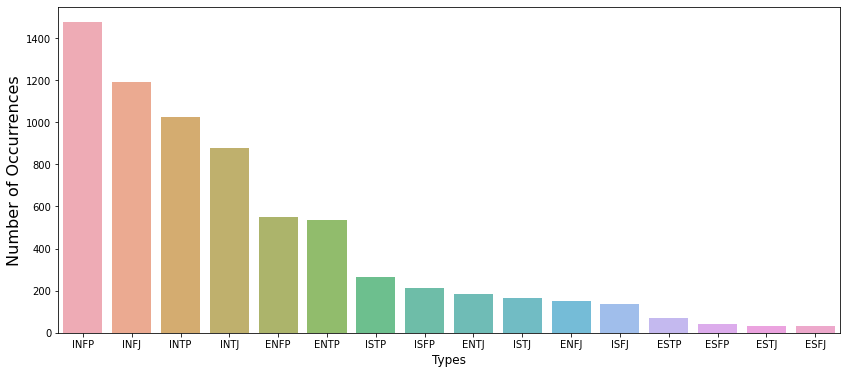

In [ ]:
cnt = train['type'].value_counts()

plt.figure(figsize=(14,6))
sns.barplot(cnt.index, cnt.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('Types', fontsize=12)
plt.show()

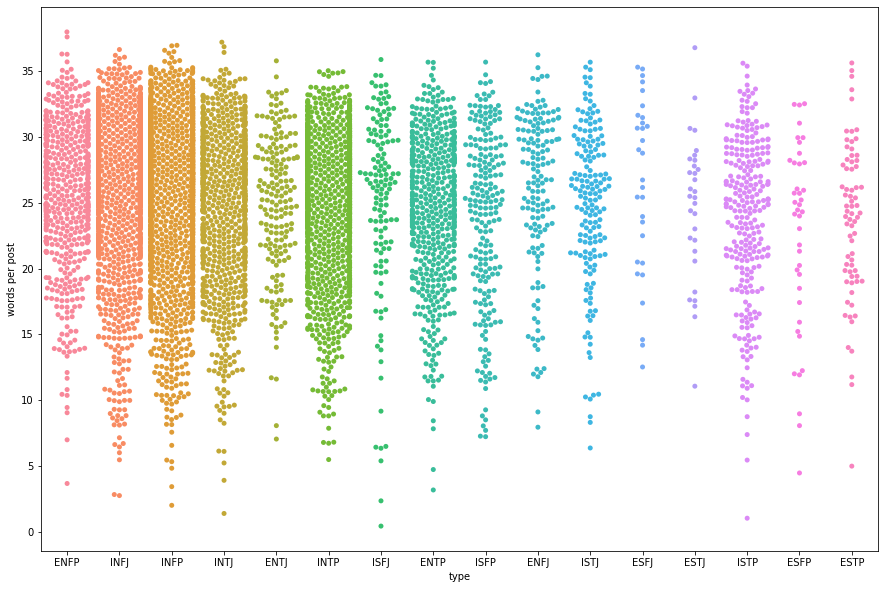

In [ ]:
import warnings
warnings.simplefilter(action='ignore') # , category=FutureWarning

plt.figure(figsize=(15,10))
sns.swarmplot("type", "words per post", data=train)

Text(0.5, 0, 'Personality Type')

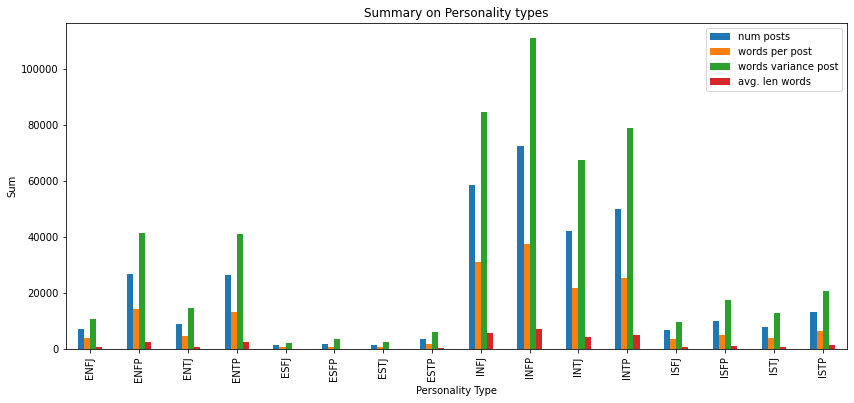

In [ ]:
figSize = (14,6)
train.groupby('type').sum().plot.bar(figsize=figSize)
plt.title('Summary on Personality types')
plt.ylabel('Sum')
plt.xlabel('Personality Type')

Text(0.5, 0, 'Personality Type')

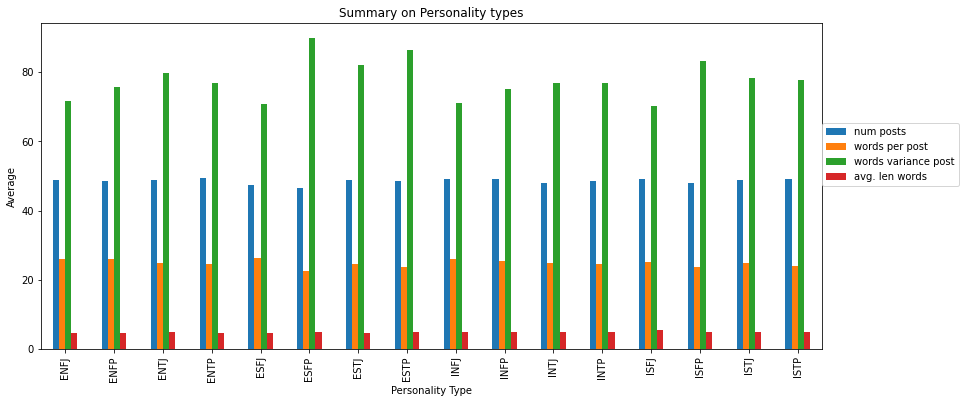

In [ ]:
train.groupby('type').mean().plot.bar(figsize=figSize)
plt.legend(loc=(1,0.5))
plt.title('Summary on Personality types')
plt.ylabel('Average')
plt.xlabel('Personality Type')

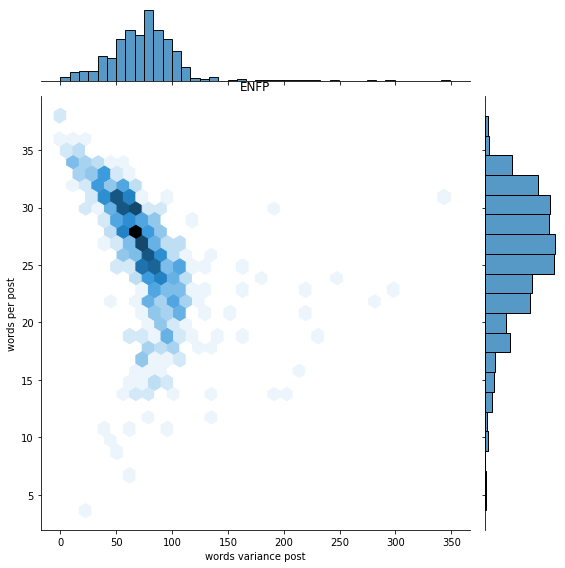

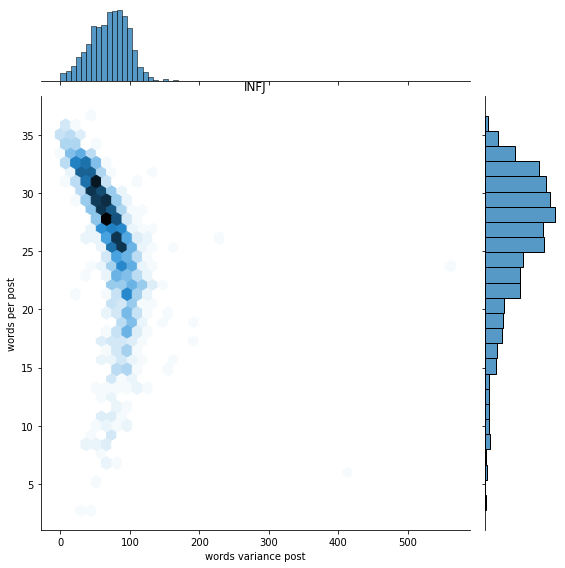

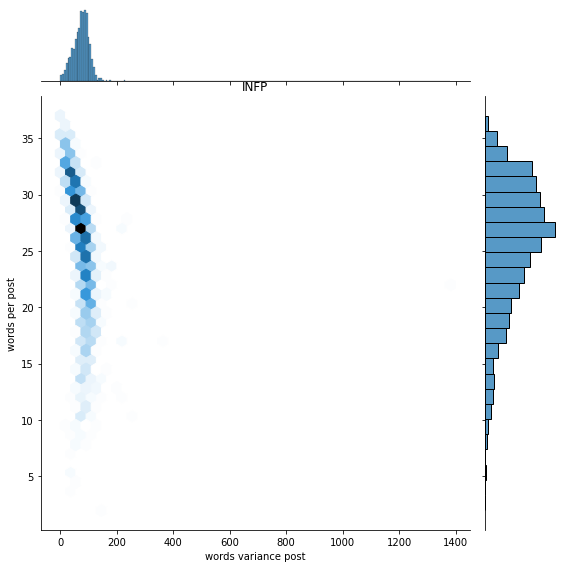

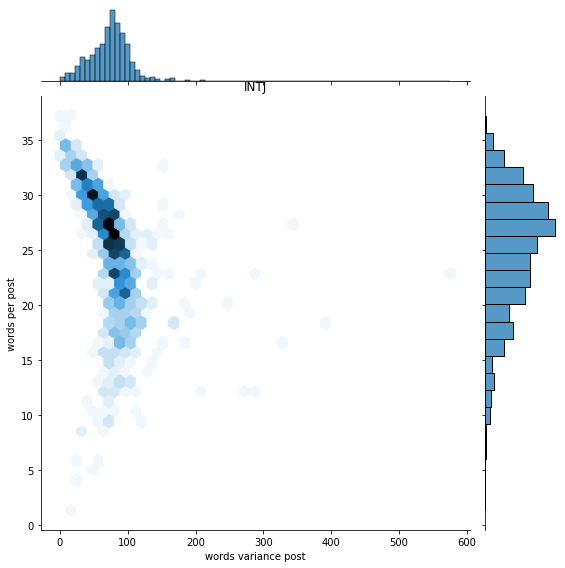

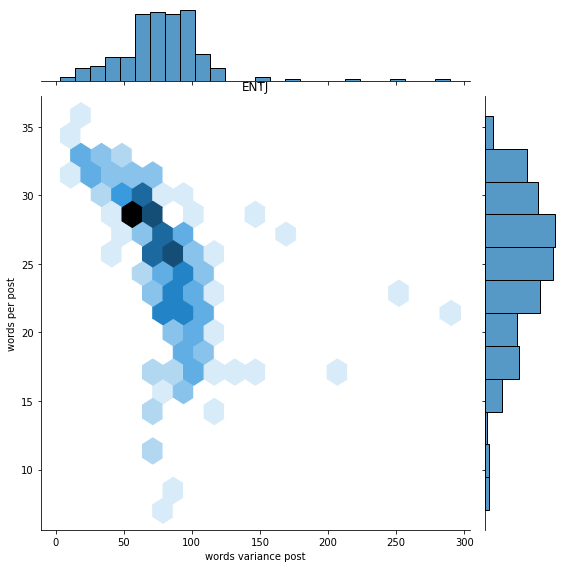

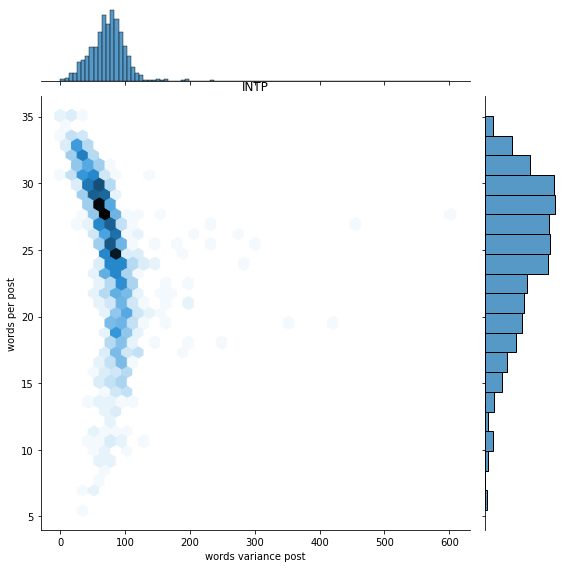

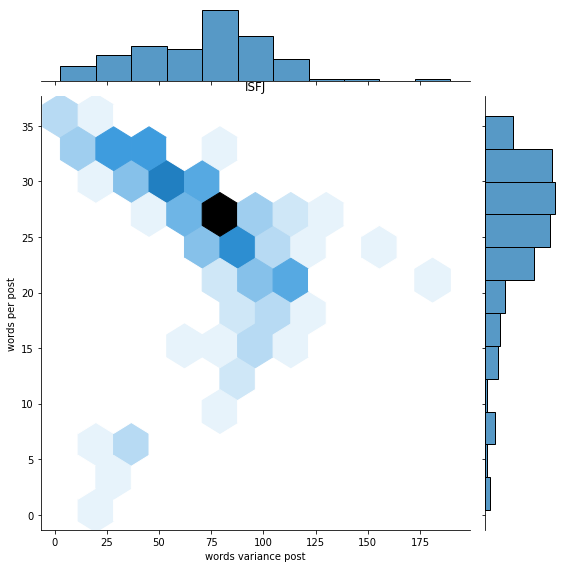

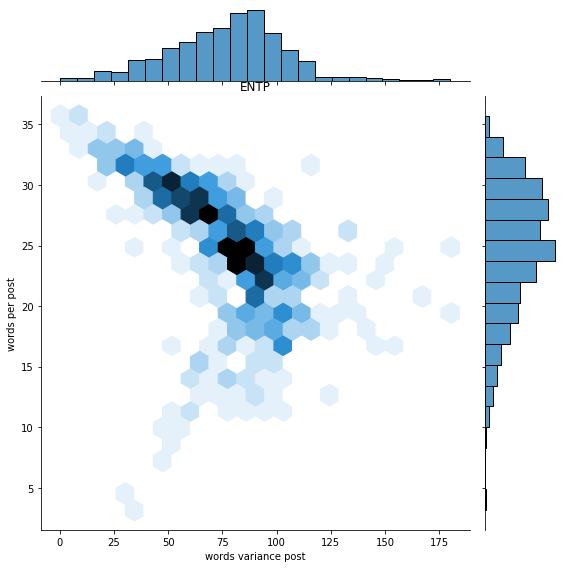

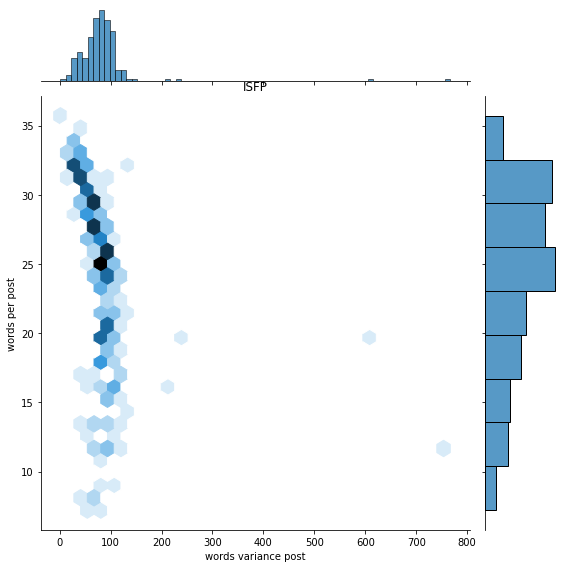

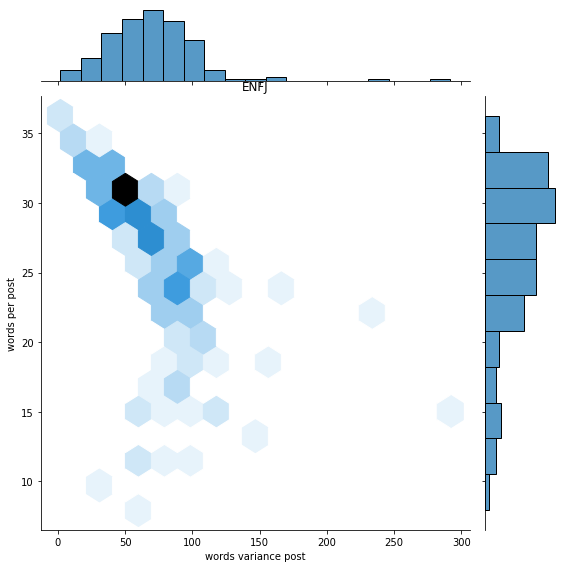

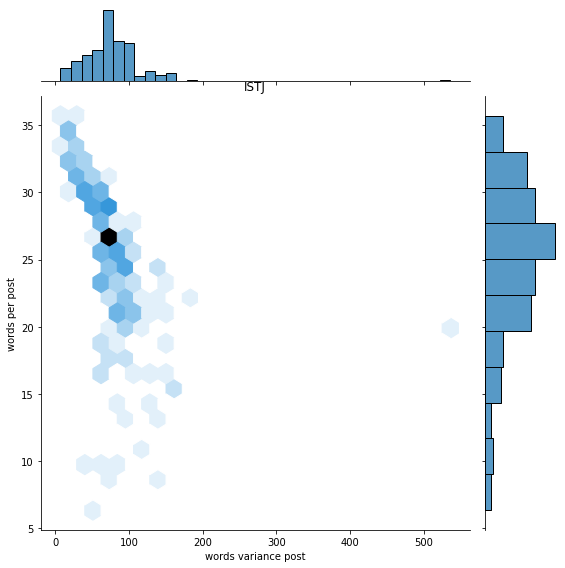

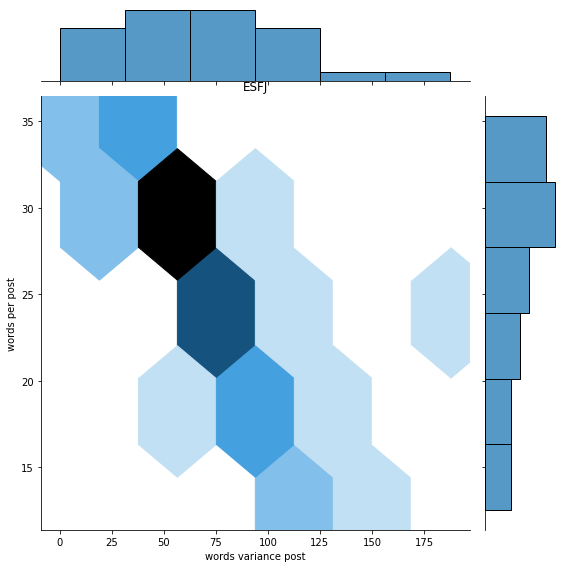

In [ ]:
i = train['type'].unique()
k = 0
for m in range(0,12):
  df = train[train['type'] == i[k]]
  sns.jointplot(x = "words variance post", y = "words per post", data=df, height=8, kind="hex")
  plt.title(i[k])
  k+=1

In [ ]:
train.describe()

,num posts,words per post,words variance post,avg. len words
count,6940.000000,6940.000000,6940.000000,6940.000000
mean,48.792507,25.168663,75.654681,4.837826
std,5.483316,5.805018,40.123022,1.423549
min,1.000000,0.420000,0.000000,3.805749
25%,50.000000,21.720000,55.817934,4.543489
50%,50.000000,26.060000,75.783652,4.698241
75%,50.000000,29.520000,91.664162,4.906337
max,89.000000,38.000000,1381.375000,103.962963


In [ ]:
test.describe()

,idx,num posts,words per post,words variance post,avg. len words
count,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000
mean,867.000000,48.975793,25.207166,75.024059,4.806131
std,500.995675,5.015373,5.574784,34.648582,0.541129
min,0.000000,5.000000,4.220000,0.109992,3.805749
25%,433.500000,50.000000,22.180000,56.032228,4.552948
50%,867.000000,50.000000,26.040000,75.614600,4.699527
75%,1300.500000,50.000000,29.320000,91.111688,4.896407
max,1734.000000,89.000000,36.980000,766.912000,10.692029


In [ ]:
train.type.value_counts()

INFP    1475
INFJ    1191
INTP    1027
INTJ     877
ENFP     549
ENTP     536
ISTP     267
ISFP     212
ENTJ     184
ISTJ     165
ENFJ     149
ISFJ     135
ESTP      72
ESFP      40
ESTJ      31
ESFJ      30
Name: type, dtype: Int64

In [ ]:
# A function to create word clouds
def visualize(label):
    words = ''
    for msg in train[train['type'] == label]['posts']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600,height=400).generate(words)
    return wordcloud

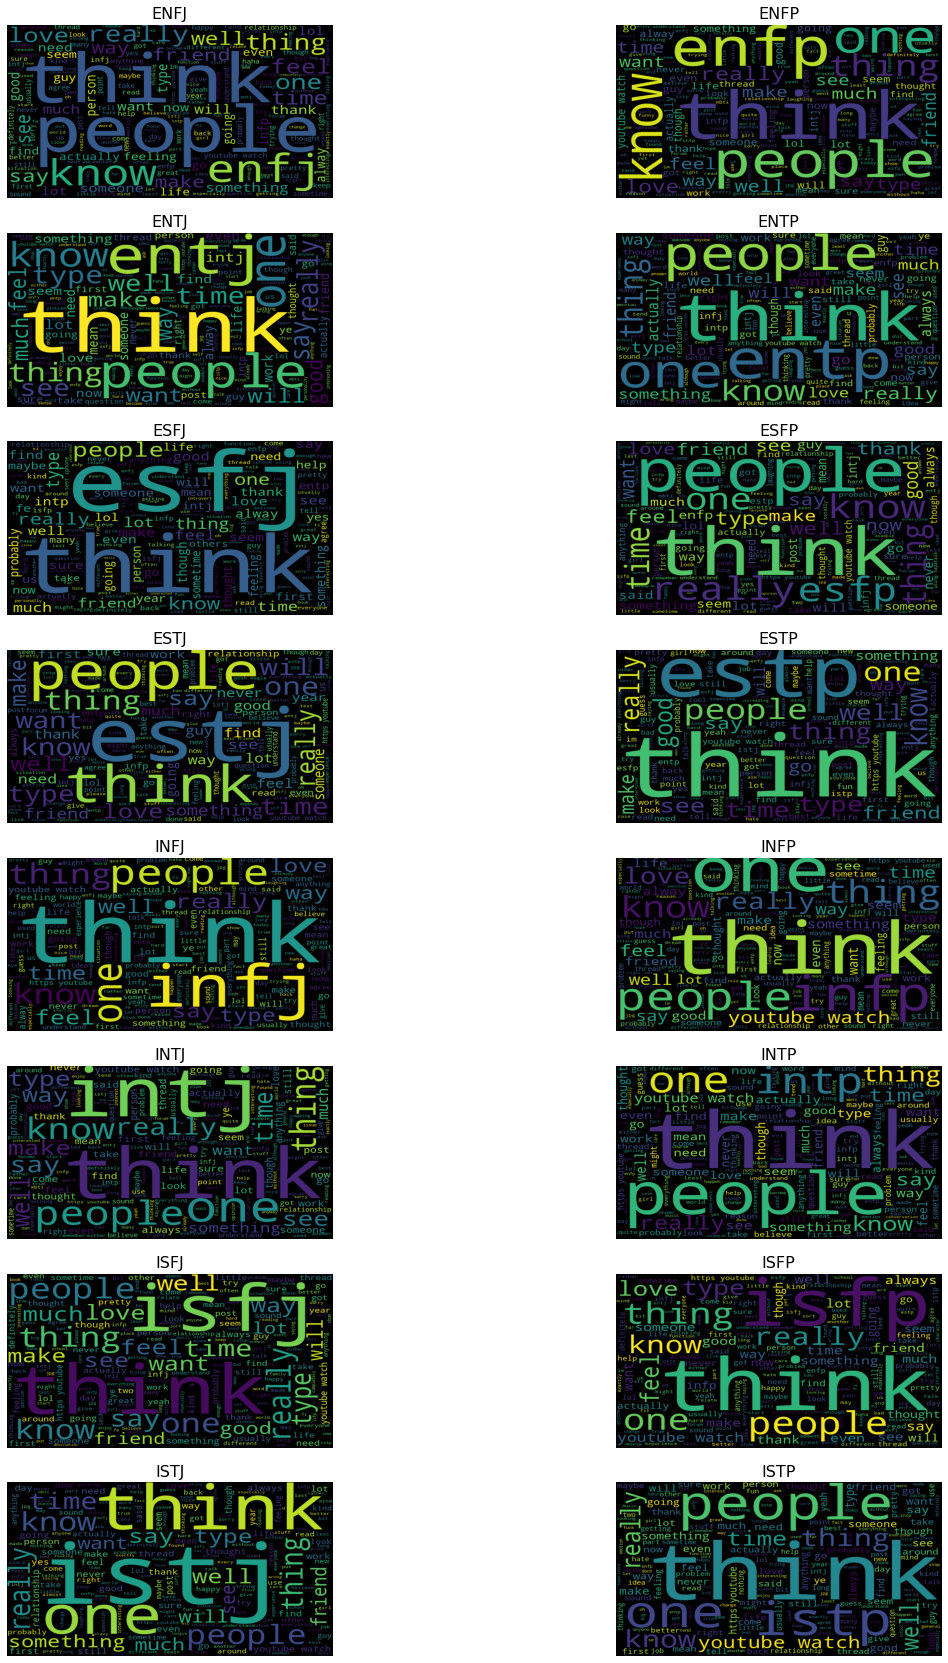

In [ ]:
# Displaying the Wordcloud for each personality type
types = sorted(train.type.unique())
fig = plt.figure(figsize=(20,30))
i = 0
for type in types:
    ax = fig.add_subplot(8,2,i+1)
    i += 1
    wordcloud = visualize(type)
    ax.imshow(wordcloud, aspect=0.8)
    ax.set_title(type, {'fontsize': 16,'fontweight' : 3})
    ax.axis('off')

## Pre-Processing

In [ ]:
# second user's posts
test_string = train.iloc[1][2]

In [ ]:
# total number of words
len(test_string.split())

1390

In [ ]:
# total number of characters
len(test_string)

7707

In [ ]:
test_string

"'^ Oh my you are right. Who really talks like that? It does sound pretty stupid.|||We've been together on and off for four years. We are long distance. He's always been wonderful to me. Very caring. But he's seeing another person. This is the second time this has happened with us.|||Well that's what it feels like to hear those words ouch.|||Well yes. He is exploring other options. I am yesterday's news.|||Please tell me your thoughts when a romantic partner says Dont despair. I have loved and always will love you, but this love must be fluid? Entp/infj interaction.|||It's so surreal to come back to this forum and read this thread. It's been over a year now, maybe getting close to two years. To anyone who reads this and is going through a similar situation my...|||INFJ's do you find yourself in the middle of conflict between two other people very often? I find this happening to me all the time and I get accused of not being loyal because of it.  I find it so...|||Sing in front of an au

In [ ]:
def remove_links(text):
    text = text.replace("..."," ")
    #Replacing ||| with a space
    text = [" ".join(string.split("|||")) for string in text.split("  ") if not string.rstrip().startswith('http')]
    #Removing links
    text = [t for t in "".join(text).split() if not (t.rstrip().startswith('http') or t.rstrip().startswith("'htt"))]
    return " ".join(text)

In [ ]:
test_string = remove_links(test_string)
print(len(test_string.split()))
print(len(test_string))

1436
7495


In [ ]:
test_string

"'^ Oh my you are right. Who really talks like that? It does sound pretty stupid. We've been together on and off for four years. We are long distance. He's always been wonderful to me. Very caring. But he's seeing another person. This is the second time this has happened with us. Well that's what it feels like to hear those words ouch. Well yes. He is exploring other options. I am yesterday's news. Please tell me your thoughts when a romantic partner says Dont despair. I have loved and always will love you, but this love must be fluid? Entp/infj interaction. It's so surreal to come back to this forum and read this thread. It's been over a year now, maybe getting close to two years. To anyone who reads this and is going through a similar situation my INFJ's do you find yourself in the middle of conflict between two other people very often? I find this happening to me all the time and I get accused of not being loyal because of it.I find it so Sing in front of an audience. Loudly and rea

In [ ]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
#Set our stemmer to PorterStemmer to reduce the words to its root stem
stemmer = nltk.stem.PorterStemmer()
#Setting our NLP model in Spacy
nlp = spacy.load('en_core_web_sm')
#Set the tokenizer
tknzr = nltk.tokenize.TweetTokenizer()
#Create the stopwords object from the Spacy NLP model
stopwords = nlp.Defaults.stop_words

In [ ]:
stopwords.difference_update({'i', 'me', 'my'})

In [ ]:
def my_preprocessor(text):
   """
        Performs text preprocessing.
        output text - lower case,punctuation free, and non-stopwords containing string object 
   """
   text = remove_links(text)
   text = text.lower()
   tokens = tknzr.tokenize(text)
   tokens = [token for token in tokens if not (token in stopwords or token in string.punctuation)]
   doc = nlp(" ".join(tokens))
   tokens = [token.lemma_ for token in doc if len(token.lemma_) > 2 and not (token.lemma_[0] == '-' and token.lemma_[-1] =='-')]
   tokens = [token.replace("."," ") for token in tokens if not token[0].isnumeric()]
   text = " ".join(tokens)
   return text

In [ ]:
test_string1 = (my_preprocessor(test_string))
len(test_string1.split())

531

In [ ]:
test_string1

'right talk like sound pretty stupid have year long distance wonderful care see person second time happen that feel like hear word ouch yes explore option yesterday news tell thought romantic partner say not despair love love love fluid entp infj interaction surreal come forum read thread year maybe get close year read similar situation infj find middle conflict people find happen time accuse loyal find sing audience loudly reach deep soul love cuddle bond non sexually entire day good lord late post contact send page email thing work complete year clearly time life threaten think trust funny folk trust complete live perfect life know mean major mistake way maybe humility painful divorce currently financial ruin divorce cost climb depth independant happy year trust interesting thing generally know small handful people trust completely sorry know sad not mean not enjoy sabrina audrey hepburn iris holiday francis tuscan sun see pattern write poor sap totally right infj forum crazy feel ho

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
#Cleaning train set
train.posts = train.posts.apply(my_preprocessor)
#Cleaning test set
test.posts = test.posts.apply(my_preprocessor)

In [ ]:
# Set X to the posts column
X = train['posts']
# Set y to the type column
y = train['type']

In [ ]:
#Create train and test splits
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#Count vectorizer. We use a bigram to give more context to our words since the sentence structure has been stripped from our posts.
vect = CountVectorizer(min_df=0.1,max_df=0.7,ngram_range=(1,2))

In [ ]:
# Create a vectorised array of the bag of words for the train and validation sets
X_train_bow = vect.fit_transform(X_train).toarray()
X_test_bow = vect.transform(X_test).toarray()
# Create the dataframes from the above arrays
X_train_bow = pd.DataFrame(X_train_bow,columns=vect.get_feature_names())
X_test_bow = pd.DataFrame(X_test_bow,columns=vect.get_feature_names())
# Creating the vectorized array from the Test data and coverting it to a dataframe
test_bow = vect.transform(test.posts).toarray()
test_bow = pd.DataFrame(test_bow,columns=vect.get_feature_names())

## Model

In [ ]:
#parameters to use in a grid search for a logistic regression
log_params ={
    'C': [1.0,0.1,0.001,10],
    'class_weight': [None,'balanced'],
    'fit_intercept': [True,False],
    'penalty': ['l2','l1'],
    'tol': [0.0001,0.001,0.1]
}

In [ ]:
#Intialise an object for the Grid Search
gridCV = GridSearchCV(LogisticRegression(),log_params)
#Fit the data to Grid Search object
gridCV.fit(X_train_bow,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 0.1, 0.001, 10],
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'penalty': ['l2', 'l1'], 'tol': [0.0001, 0.001, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=N

In [ ]:
#Get the best parameters from our Grid Search
gridCV.best_params_

{'C': 0.001,
 'class_weight': 'balanced',
 'fit_intercept': False,
 'penalty': 'l2',
 'tol': 0.0001}

In [ ]:
#use the optimal hyperparameters to instantiate the model
log_reg = LogisticRegression(C=0.001,class_weight='balanced',fit_intercept=False,tol=0.0001,n_jobs=-1)

In [ ]:
#Fit data to prediction model
log_reg.fit(X_train_bow,y_train)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluate

In [ ]:
#Predict the personality types using the model
preds = log_reg.predict(X_test_bow)

In [ ]:
#Lets look at our prediction accuracy using the classification report
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

        ENFJ       0.63      0.33      0.43        52
        ENFP       0.65      0.66      0.66       119
        ENTJ       0.67      0.40      0.50        55
        ENTP       0.54      0.63      0.58        97
        ESFJ       1.00      0.23      0.38        13
        ESFP       0.14      0.10      0.12        10
        ESTJ       0.50      0.17      0.25        12
        ESTP       0.47      0.26      0.33        27
        INFJ       0.60      0.76      0.67       180
        INFP       0.70      0.80      0.75       249
        INTJ       0.60      0.72      0.66       154
        INTP       0.68      0.76      0.72       191
        ISFJ       0.73      0.53      0.61        51
        ISFP       0.66      0.43      0.52        49
        ISTJ       0.74      0.39      0.51        59
        ISTP       0.70      0.61      0.66        70

    accuracy                           0.65      1388
   macro avg       0.63   

## Predict

In [ ]:
#Quick look at the Test data
test.head()

,idx,posts,num posts,words per post,words variance post,avg. len words
0,0,true say earlier face expressive get trouble t...,50,29.92,44.414728,4.695844
1,1,congrat spade awesome hug jeff congrats girl c...,50,22.20,100.948000,5.044524
2,2,@brokengeniushere alternate perspective actual...,50,24.30,90.423528,5.134146
3,3,yeah realize trio mugen estp clear usage momen...,50,27.02,65.014408,4.543245
4,4,hehe thanks buddy that want sound overly impre...,50,31.22,25.521800,4.895298


In [ ]:
#Predicting the personality types from the Test data
prediction = log_reg.predict(test_bow)

In [ ]:
prediction.tolist()

['INFP',
 'ENFJ',
 'ENTP',
 'ESTP',
 'INFJ',
 'INTJ',
 'ENTP',
 'INTP',
 'INFJ',
 'INTP',
 'ENFP',
 'INTP',
 'ISTJ',
 'INTP',
 'INFJ',
 'ENTJ',
 'ISTP',
 'INTJ',
 'INTJ',
 'INFP',
 'ISFP',
 'ISTJ',
 'INFP',
 'INFP',
 'ESFJ',
 'ISTP',
 'ENTP',
 'ISFP',
 'INFP',
 'INTP',
 'ENFP',
 'INFP',
 'ISFJ',
 'ENTJ',
 'ISTP',
 'INTJ',
 'ENTJ',
 'INTP',
 'ENTJ',
 'INTP',
 'ISFJ',
 'ESTP',
 'INFJ',
 'INFJ',
 'ENTJ',
 'INFP',
 'ENFJ',
 'INFP',
 'INFP',
 'ISFP',
 'INFJ',
 'INFJ',
 'INFP',
 'ESFJ',
 'INFP',
 'ISFJ',
 'ISFP',
 'INFP',
 'ISFP',
 'ISTJ',
 'INFJ',
 'ISTP',
 'INFP',
 'ISFJ',
 'INFJ',
 'ISTP',
 'INFJ',
 'INTP',
 'INFP',
 'INFP',
 'ISFP',
 'INFP',
 'ISTJ',
 'ISFP',
 'INFP',
 'INFP',
 'INTJ',
 'INTP',
 'INFP',
 'INTP',
 'INTP',
 'INTP',
 'ENFP',
 'ISFJ',
 'INFP',
 'ISFP',
 'INTJ',
 'INTJ',
 'ENFP',
 'ENTP',
 'INFP',
 'ENTJ',
 'ENTJ',
 'ESTP',
 'ENTP',
 'ENFP',
 'ENFP',
 'INFJ',
 'INTJ',
 'INTP',
 'INTJ',
 'ISFP',
 'ISTP',
 'INTJ',
 'ENFP',
 'INTP',
 'ISTJ',
 'INFP',
 'ISFP',
 'ESFP',
 'ENTP',
 

In [ ]:
pred_df = pd.DataFrame({'idx': test.idx.tolist(), 'type': prediction.tolist()})